In [5]:
import numpy as np
from matplotlib import pyplot as plt
import librosa
import librosa.display
import soundfile

In [6]:
Fs = 16000
Ts = 0.01   # 10 ms shift size
Tf = 0.02   # 20 ms frame size
Ns = int(Fs*Ts)    # shift number of samples
Nf = int(Fs*Tf)    # frame number of samples
## librosa 사용 resampling ##
def re_sample(wavefile,origin_sr,resample_sr):
    x, sr = librosa.load(wavefile, sr=16000)
    resample = librosa.resample(x, sr, resample_sr)
    print("original wav sr: {} resample wav sr:{}".format(origin_sr, resample_sr))

    return(resample)

In [7]:
wavefile = 'D:/YYN/audio_/digitrec/segmented/YouYeNa/3/kdigits0-3.wav'
x , sr = librosa.load(wavefile , sr=16000)
# 목소리 나오는 부분
x = x[int(Fs*0.5):int(Fs*1.5)]
resample_sr = 48000
y = re_sample(wavefile, Fs, resample_sr)
stft = librosa.stft(y, n_fft=Nf, hop_length=Ns)
magnitude = np.abs(stft)
log_spectrogram = librosa.amplitude_to_db(magnitude)

original wav sr: 16000 resample wav sr:48000


C:\Users\yena\AppData\Local\Temp\ipykernel_24120\615722393.py:9: FutureWarning: Pass orig_sr=16000, target_sr=48000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  resample = librosa.resample(x, sr, resample_sr)


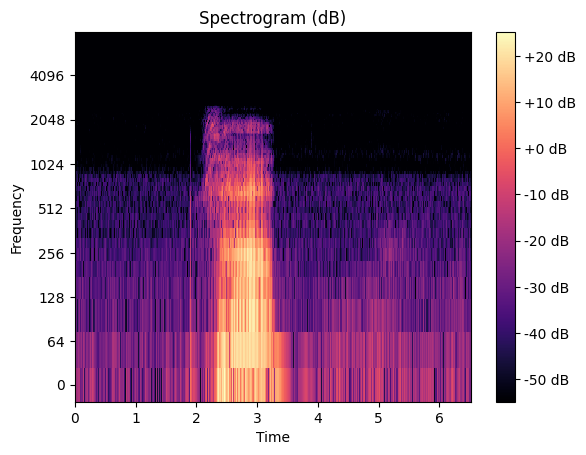

In [8]:
plt.figure()
librosa.display.specshow(log_spectrogram, sr=Fs, hop_length=Ns, x_axis='time', y_axis='log')
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")
plt.show()

soundfile.write('D:/YYN/audio_/resample/function{}.wav'.format(resample_sr),y,sr)